In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [7]:
reeses = cv2.imread(r"C:\Users\umut3\Desktop\Computer-Vision-with-Python\DATA\reeses_puffs.png",0)

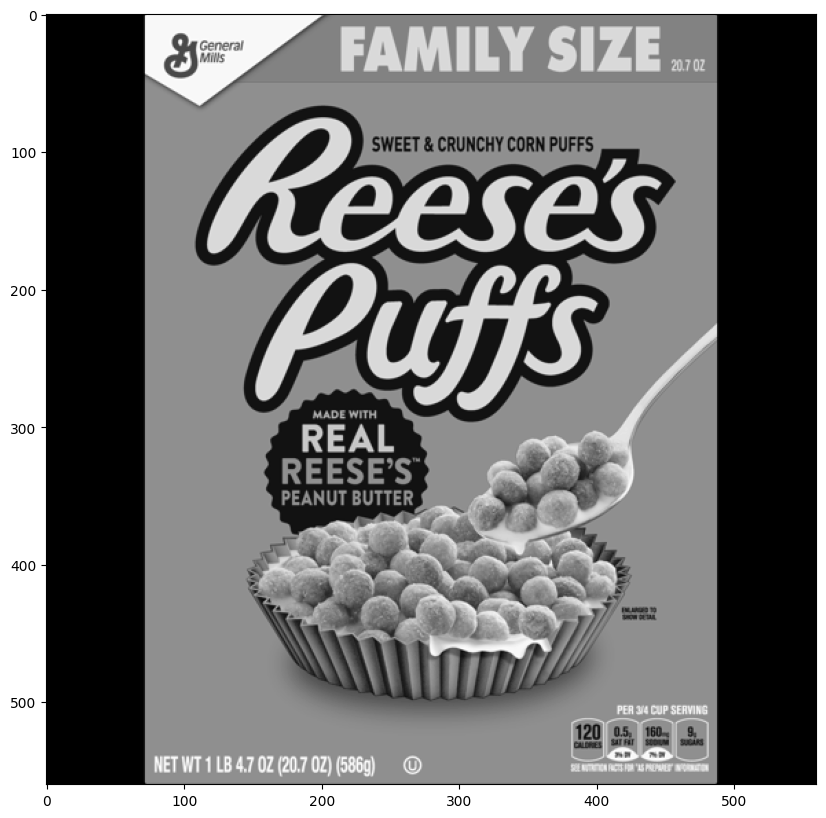

In [8]:
display(reeses)

In [11]:
cereals = cv2.imread(r"C:\Users\umut3\Desktop\Computer-Vision-with-Python\DATA\many_cereals.jpg",0)

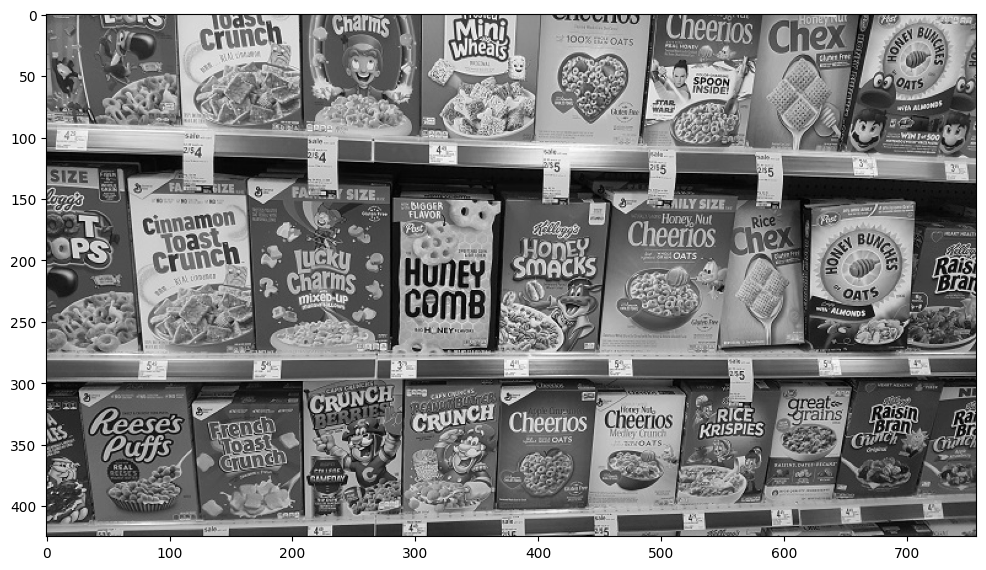

In [12]:
display(cereals)

In [13]:
orb = cv2.ORB_create()

In [14]:
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

In [15]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [16]:
matches = bf.match(des1, des2)

In [17]:
single_match = matches[0]

In [18]:
single_match.distance

56.0

In [19]:
matches = sorted(matches, key=lambda x:x.distance)

In [21]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)

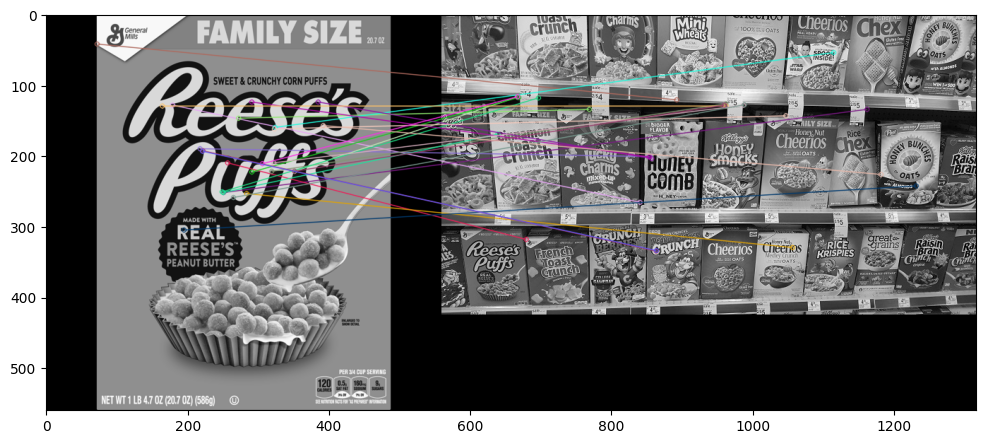

In [22]:
display(reeses_matches)

In [28]:
sift = cv2.SIFT_create()

In [29]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [31]:
bf = cv2.BFMatcher()

In [32]:
des1

array([[19.,  0.,  0., ...,  1.,  0.,  0.],
       [15.,  0.,  0., ..., 11.,  1.,  0.],
       [21.,  0.,  0., ...,  0., 10., 13.],
       ...,
       [61.,  6.,  0., ...,  0.,  0.,  0.],
       [27.,  0.,  0., ...,  0.,  0.,  0.],
       [48.,  0.,  0., ...,  0.,  1.,  0.]], dtype=float32)

In [33]:
matches = bf.knnMatch(des1, des2, k=2)

In [34]:
matches

((< cv2.DMatch 000001B0B0D68A90>, < cv2.DMatch 000001B0B0D69750>),
 (< cv2.DMatch 000001B0B0D6AB30>, < cv2.DMatch 000001B0B0D697B0>),
 (< cv2.DMatch 000001B0B0D69CF0>, < cv2.DMatch 000001B0B0D69E50>),
 (< cv2.DMatch 000001B0B0D69350>, < cv2.DMatch 000001B0B0D68C30>),
 (< cv2.DMatch 000001B0B0D69430>, < cv2.DMatch 000001B0B0D69910>),
 (< cv2.DMatch 000001B0B0D69370>, < cv2.DMatch 000001B0B0D69450>),
 (< cv2.DMatch 000001B0B0D69210>, < cv2.DMatch 000001B0B0D693B0>),
 (< cv2.DMatch 000001B0B0D6ABD0>, < cv2.DMatch 000001B0B0D6AB50>),
 (< cv2.DMatch 000001B0B0D695D0>, < cv2.DMatch 000001B0B0D69FD0>),
 (< cv2.DMatch 000001B0B0D6B270>, < cv2.DMatch 000001B0B0D69590>),
 (< cv2.DMatch 000001B0B0D68DF0>, < cv2.DMatch 000001B0B0D69CD0>),
 (< cv2.DMatch 000001B0B0D6A690>, < cv2.DMatch 000001B0B0D6A610>),
 (< cv2.DMatch 000001B0B0D69310>, < cv2.DMatch 000001B0B0D69270>),
 (< cv2.DMatch 000001B0B0D695F0>, < cv2.DMatch 000001B0B0D691F0>),
 (< cv2.DMatch 000001B0B0D693D0>, < cv2.DMatch 000001B0B0D6A5D

In [35]:
good = []

for match1, match2 in matches:

    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [38]:
len(good)

79

In [39]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

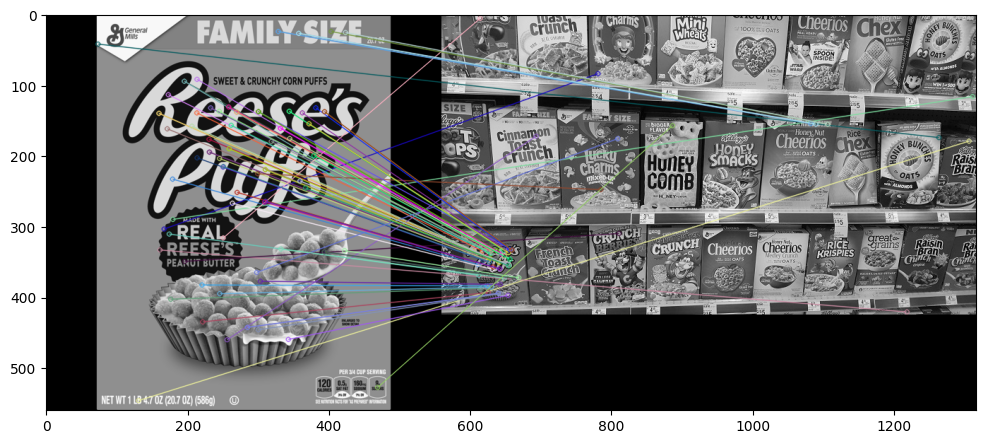

In [40]:
display(sift_matches)

In [41]:
sift = cv2.SIFT_create()

In [42]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [46]:
# FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, tree=5)
search_params = dict(checks=50)

In [47]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [48]:
matches = flann.knnMatch(des1, des2, k=2)

In [56]:
matchesMask = [[0,0] for i in range(len(matches))]

In [57]:


for i, (match1, match2) in enumerate(matches):

    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]

In [62]:
draw_params = dict(matchColor=(0,255,0),
                  singlePointColor=(255, 0, 0),
                  matchesMask=matchesMask, 
                  flags=2)# if flags is 0 it will be colorfull

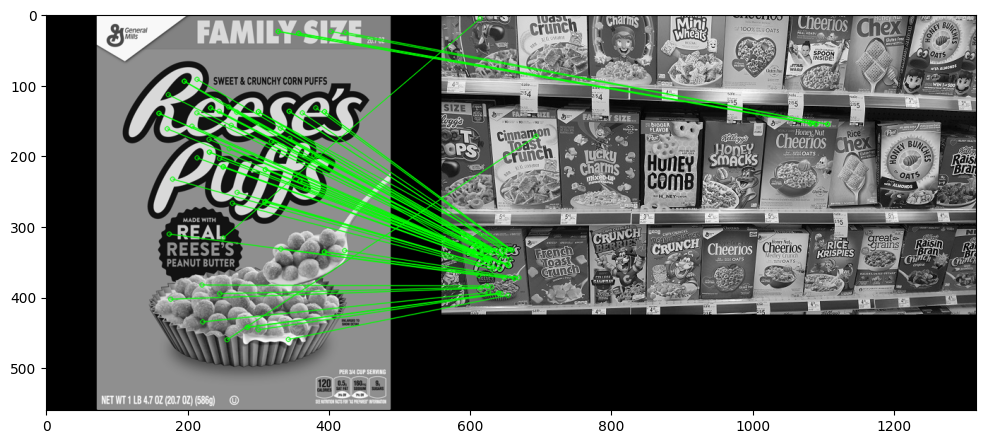

In [63]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)
display(flann_matches)